## Общая информация

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Здесь мы приоритизируем гипотезы, запустим A/B-тест и проанализируем его результаты.

**Описание данных**

Файл *hypothesis.csv*

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл *orders.csv*

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл *visitors.csv*

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Начнём с общей информации о проекте: загрузим необходимые библиотеки и познакомимся с таблицами.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
import datetime as dt
import numpy as np

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150 

In [2]:
try: 
    hypothesis, orders, visitors = (pd.read_csv('/datasets/hypothesis.csv'), 
                                    pd.read_csv('/datasets/orders.csv'),
                                    pd.read_csv('/datasets/visitors.csv'))
except:
    hypothesis, orders, visitors = (pd.read_csv('hypothesis.csv'), 
                                    pd.read_csv('orders.csv'),
                                    pd.read_csv('visitors.csv'))

In [3]:
def information(data):
    display(data.info())
    display(data.head(10))
    print('Выявлено дубликатов:', data.duplicated().sum())
    print('Выявлено пропусков:')
    print(round((data.isna().mean()*100),2))

In [4]:
information(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Выявлено дубликатов: 0
Выявлено пропусков:
Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64


In [5]:
information(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Выявлено дубликатов: 0
Выявлено пропусков:
transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64


In [6]:
information(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Выявлено дубликатов: 0
Выявлено пропусков:
date        0.0
group       0.0
visitors    0.0
dtype: float64


Пропусков в таблицах нет, дубликатов тоже. В таблице hypothesis хранятся названия гипотез и параменты по ним; в таблице orders - данные о заказах: номер заказа, айди пользователя, дата заказа, выручка и группа, к которой относится пользователь; в таблице visitors - информация о количестве посетителей в каждый конкретный день и принадлежность их к группе теста.

Сильно в таблицах ничего менять не будем, заменим только в orders и visitors формат даты.

In [7]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Посмотрим, сколько пользователей находится в каждой из групп

In [8]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Пользователи по группам распределены не равномерно. В группе В на 80 пользователей больше. 

Посмотрим, есть ли пользователи, находящиеся в обеих группах теста

In [9]:
users_in_both_groups = orders.pivot_table(index='visitorId', values='group', aggfunc='nunique')
users_in_both_groups.query('group >= 2').count()

group    58
dtype: int64

Таких пользователей оказалось 58. Делать с ними ничего не будем, т.к. конкретных указаний по их поводу мы не получали, просто будем иметь их в виду.

В принципе данные готовы для дальнейшей работы. Пропусков и дубликатов ни в одной из таблиц нет, дата приведена в необходимый формат.

## Приоритизация гипотез

Для приоритизации гипотез воспользуемся способамми ICE и RICE. Посмотрим снова на таблицу hypothesis. 


In [10]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Сначала посчитаем ICE для всех наших гипотез.

In [11]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


В лидерах гипотеза под номером 8: "Запустить акцию, дающую скидку на товар в день рождения". В топ лидеров попали ещё гипотезы под номерами 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и 6 "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"

Посмотрим, сохранятся ли лидеры, если приоритизировать гипотезы методом RICE

In [12]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Гипотезы под номерами 7, 6 и 0 остались в топе, а вот гипотеза под номером 8 уехала на пятую строчку. 

Разница в приоритетах случилась из-за того, что метод ICE учитывает изменение удовлетворённости пользователей пользователей, затраты на проверку гипотезы и уверенность в гипотезе, в то время как в методе RICE добавляется ещё и охват пользователей, то есть насколько много людей смогут нововведение оценить. Здесь у гипотезы под номером 7 все показатели достаточно высокие, а затраты низкие, вот она и выбилась в лидеры с самым показателем охвата аудитории.

## Анализ A/B-теста

Мы запустили A/B-тест, получили по нему данные в таблицах orders и visitors, и тепепь можем начать их анализ.

### График кумулятивной выручки

Первым делом построим график кумулятивной выручки, чтобы увидеть, как накапливались данные. Чтобы построить графики, нужно собрать кумулятивные данные.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates()

In [13]:
datesGroups = orders[['date','group']].drop_duplicates() 

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий.

Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups.

Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков.

In [14]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина

In [15]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одну с понятными названиями столбцов

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования

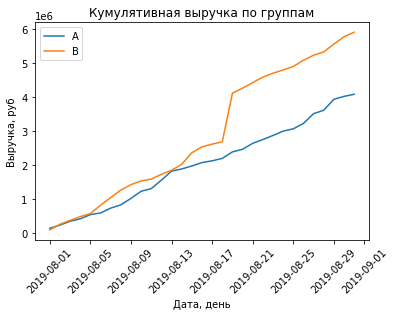

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=45)
plt.legend() 
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата, день')
plt.ylabel('Выручка, руб')
plt.legend() 

Выручка увеличивается в течение всего теста. Для группы В заметен резкий скачок по прибыли 17.08, и дальше обе группы увеличиваются практически идентично. Скачок может говорить о том, что, например, в это время совершили несколько очень дорогих заказов.

### График кумулятивного среднего чека

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

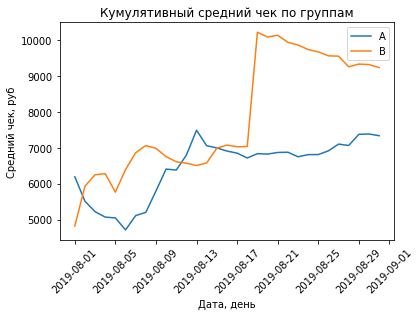

In [18]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата, день')
plt.ylabel('Средний чек, руб')
plt.legend() 
plt.legend()

Кумулятивный средний чек нестабилен. Того же 17.08 со средним чеком группы В что-то произошло, возможно, те самые очень крупные чеки. Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. На графике видно резкий рост, после которого небольшое снижение. Чек группы А стабилизируется во второй половине месяца на отметке 7000-8000.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека

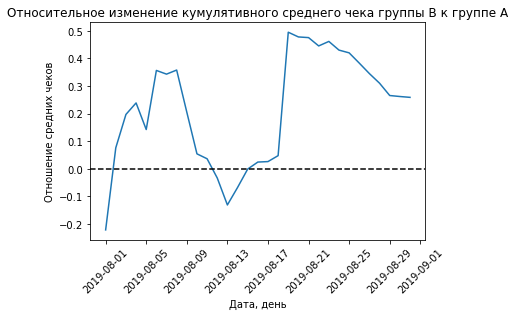

In [19]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата, день')
plt.ylabel('Отношение средних чеков')
plt.show()

На графике видно резкий спад с 09.08 по 13.08 и резкий рост 17.08. График скачет, значит, на него влияют выбросы.

### График кумулятивной конверсии по группам

Аналогично проанализируем график кумулятивной конверсии

(18109.0, 18139.0, 0.02, 0.04)

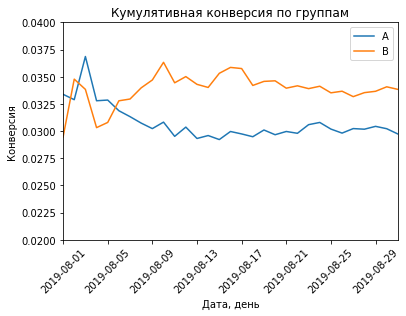

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("Кумулятивная конверсия по группам")
plt.xlabel('Дата, день')
plt.ylabel('Конверсия')

# задаем масштаб осей
plt.axis([datetime.strptime('2019-08-01', '%Y-%m-%d'), datetime.strptime('2019-08-31', '%Y-%m-%d'), 0.02, 0.04])

В начале наблюдений видны колебания на обоих графиках, в дальнейшем конверсия группы В стала больше и стабилизировалась на значении примерно 0.035, а конверсия группы А находится на значении 0.03. На графике конверсия значительна, но по числовым значениям получается, что конверсия группы В примерно 3,5%, а группы А - 3%.

### График относительного изменения кумулятивной конверсии группы B к группе A

Построим график относительного различия кумулятивных конверсий

(18109.0, 18139.0, -0.2, 0.3)

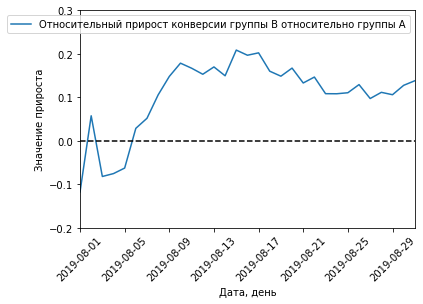

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xlabel('Дата, день')
plt.ylabel('Значение прироста')

plt.xticks(rotation=45)

plt.axhline(y=0, color='black', linestyle='--')
plt.axis([datetime.strptime('2019-08-01', '%Y-%m-%d'), datetime.strptime('2019-08-31', '%Y-%m-%d'), -0.2, 0.3])

Сначала конверсия группы В была меньше, но затем выросла.

### Точечный график количества заказов по пользователям

Подсчитаем количество заказов по пользователям

In [22]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['transactionId', 'orders']

Построим точечный график количества заказов по пользователям

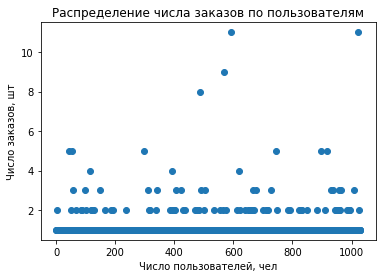

In [23]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

plt.title('Распределение числа заказов по пользователям')
plt.xlabel('Число пользователей, чел')
plt.ylabel('Число заказов, шт')
plt.show()

Большинство пользователей совершили 1 заказ, ожидаемо. Можно предположить, что аномальными будут являться от 4 заказов на пользователя.

### 95-й и 99-й перцентили количества заказов на пользователя

Для наглядности сгруппируем число заказов по пользователям и найдём наибольшее количество заказов на одного пользователя.

In [24]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head()

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Самое большое количество заказов у одного пользователя - 11.

Т.к. принято отсеивать от 1% до 5% наблюдений с крайними значениями, найдём 95 и 99 перцентили среднего чека в выборке

In [25]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Раз 95 перцентиль равен 2, значит, 95% всех пользователей совершили 1-2 заказа. И не больше 1% пользователей совершили 4 заказа. Примем аномальные заказы больше 3.

### Точечный график стоимостей заказов

Построим точечный график стоимостей заказов

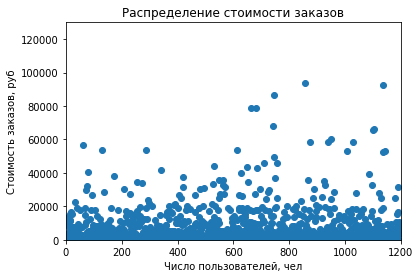

In [26]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Распределение стоимости заказов')
plt.xlabel('Число пользователей, чел')
plt.ylabel('Стоимость заказов, руб')
plt.axis([0, 1200, 0, 130000])

plt.show()

Как мы и предполагали, есть несколько дорогих заказов стоимостью около 100 тыс. рублей, большинство заказов находятся в пределах 20 тыс. рублей. По графику можно выбрать границу аномальных заказов между 30 и 40 тыс. рублей.

### 95-й и 99-й перцентили стоимости заказов

Определим 95 и 99 перцентили среднего чека в выборке

In [27]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

95% пользователей совершали заказы на сумму меньше 28 тыс рублей. И всего 1% пользователей совершили заказы дороже 58 тыс. Можно принять за границу аномальных заказов заказы стоимостью 30 тыс. рублей.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Начнём с подготовки данных

In [28]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаем статистическую значимость различия в конверсии между группами.
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [29]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [30]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Сформулируем гипотезы

Н0 - различия в конверсиях между группами по «сырым» данным статистически не значимы

Н1 - различия в конверсиях между группами по «сырым» данным статистически значимы

Пороговое значение alpha примем за 5%.

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [31]:
print("P-value по конверсии до очистки данных: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value по конверсии до очистки данных: 0.017
Относительный прирост конверсии группы B: 0.138


Первое число — p-value = 0.017, меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

Второе число говорит о том, что прирост конверсии для группы В на 13.8% больше, чем для группы А.

### статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Сравним средние чеки по "сырым" данным.

Сформулируем гипотезы

Н0 - различия в среднем чеке заказа между группами по «сырым» данным статистически не значимы

Н1 - различия в среднем чеке заказа между группами по «сырым» данным статистически значимы

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.

А ещё найдём относительные различия в среднем чеке между группами

In [32]:
print('P-value по среднему чеку до очистки данных {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B к среднему чеку группы А до очистки данных: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value по среднему чеку до очистки данных 0.729
Относительный прирост среднего чека группы B к среднему чеку группы А до очистки данных: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. И средний чек группы B значительно выше среднего чека группы A, аж на 25%

### статистическую значимость различий в конверсии между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 30 тыс рублей. 

In [33]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head()

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorId, dtype: int64

In [34]:
abnormalUsers.shape

(53,)

53 аномальных пользователя

In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [36]:
print('P-value по конверсии после очистки данных: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B к конверсии группы А после очистки данных: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value по конверсии после очистки данных: 0.019
Относительный прирост конверсии группы B к конверсии группы А после очистки данных: 0.144


Как и в случае с сырыми данными, статистическая значимость достигнута. Отвергаем нулевую гипотезу. Сегмент B лучше сегмента А. Относительный прирост конверсии очищенной группы B к А увеличился на 2% и равен 15%

### статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Результаты по конверсии практически не изменились. Произошло ли что-нибудь с результатами по среднему чеку?

In [37]:
print(
    'P-value по среднему чеку после очистки данных: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека группы B к среднему чеку группы А после очистки данных: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value по среднему чеку после очистки данных: 0.979
Относительный прирост среднего чека группы B к среднему чеку группы А после очистки данных: -0.017


P-value увеличился, но и разница между сегментами сократилась с 25% до -2%.

## Вывод

Опираясь на полученные результаты и несмотря на то, что по среднему чеку статистической значимости не обнаружено, рекомендовано остановить тест и зафиксировать победу группы В. Группа B статистически значимо лучше группы A по метрике конверсии, но различий в средних чеках нет. Так как задача стоит в эффективности гипотезы по увеличению выручки, следует обратить внимание на конверсию. Выручка не всегда покажет положительную или отрицательную динамику, точнее сложно понять по выручке, без учета числа покупателей.

Коверсия влияет на выручку, и поэтому раз конверсия в случае группы В значимо увеличилась, то и выручка увеличилась тоже. Даже с учетом того, что средний чек остался без изменений.